<a href="https://colab.research.google.com/github/Patchaa119/datavis2025/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Visualize_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การแสดงผลการกระจายของข้อมูล

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
stopandsearch_df = pd.read_csv('/content/drive/My Drive/Python&Dataviz2025/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv')
stopandsearch_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


แปลงค่า Gender และ Age range เป็นจำนวนจริง

In [12]:
stopandsearch_df.groupby('Gender').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Gender,,,,,,,,,,,,,,
Female,40,40,40,0,34,34,40,39,37,40,40,40,10,40
Male,287,287,287,0,240,240,278,280,276,287,287,287,107,287


In [13]:
stopandsearch_df.groupby('Age range').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Age range,,,,,,,,,,,,,,
10-17,45,45,45,0,39,39,43,42,42,45,45,45,17,45
18-24,99,99,99,0,84,84,84,96,97,99,99,99,41,99
25-34,80,80,80,0,63,63,71,79,75,80,80,80,32,80
over 34,126,126,126,0,104,104,119,122,122,126,126,126,40,126
under 10,1,1,1,0,1,1,1,1,1,1,1,1,0,1


In [14]:
stopandsearch_df.shape

(387, 15)

In [15]:
stopandsearch_df_dropna = stopandsearch_df.dropna(subset=['Age range','Gender'])

In [16]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'].replace({'under 10': 10, 'over 34': 34,
                                                                                     '25-34':30,'18-24':21,'10-17':14})

/tmp/ipython-input-3376285857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

### สร้าง list ของ ตัวเลข random number ที่เป็น normal distribution

In [17]:
import numpy as np
list_of_rn = np.random.normal(loc=1, scale=0.1, size=len(stopandsearch_df_dropna))

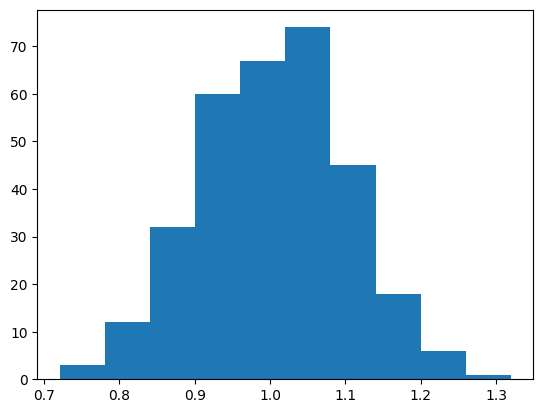

In [18]:
plt.hist(list_of_rn);

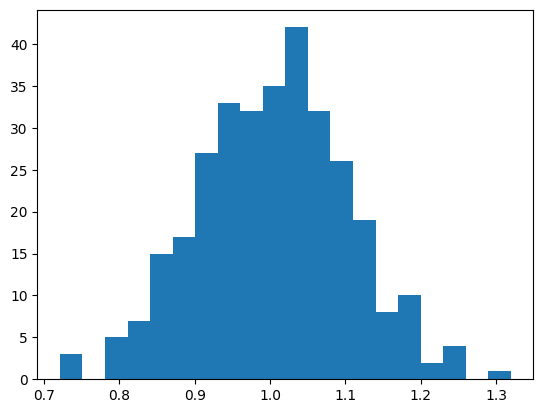

In [62]:
plt.hist(list_of_rn,bins=20);

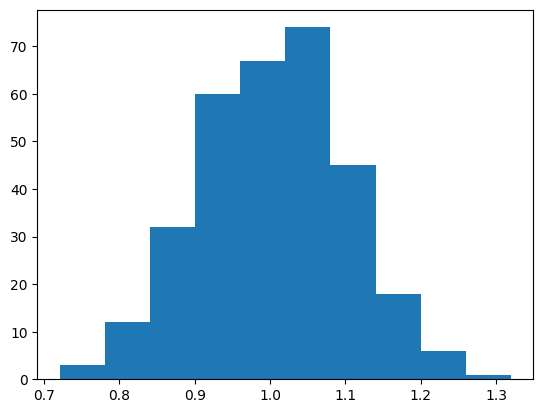

In [58]:
hist_out = plt.hist(list_of_rn,bins=10);

In [59]:
hist_out

(array([ 3., 12., 32., 60., 67., 74., 45., 18.,  6.,  1.]),
 array([0.72096581, 0.78083361, 0.84070141, 0.90056921, 0.96043701,
        1.02030481, 1.08017261, 1.14004041, 1.19990821, 1.25977601,
        1.3196438 ]),
 <BarContainer object of 10 artists>)

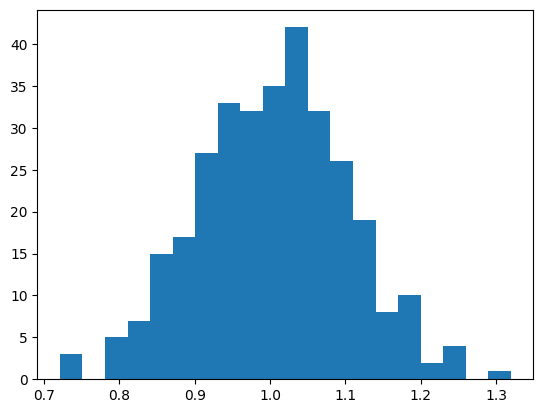

In [61]:
hist_out = plt.hist(list_of_rn,bins=20);

In [19]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn

/tmp/ipython-input-864405060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn


In [20]:
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))

/tmp/ipython-input-2945934892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))


### ลบค่าที่เป็น outliers

In [21]:
stopandsearch_df_dropna = stopandsearch_df_dropna[(stopandsearch_df_dropna['Gender']>=0) & (stopandsearch_df_dropna['Gender']<40)]

In [22]:
stopandsearch_df_dropna.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,35.578953,30.143316,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,30.987020,13.857842,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,32.273232,14.145320,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,0.897254,13.894936,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,34.236785,13.911355,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


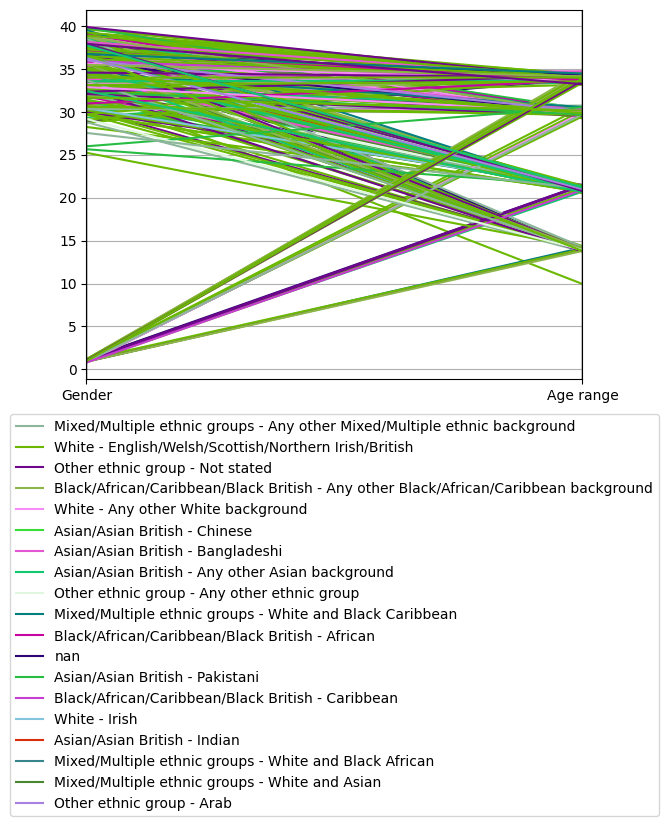

In [23]:
pd.plotting.parallel_coordinates(stopandsearch_df_dropna[['Gender','Age range','Self-defined ethnicity']],'Self-defined ethnicity')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.2))

# Scatter plot

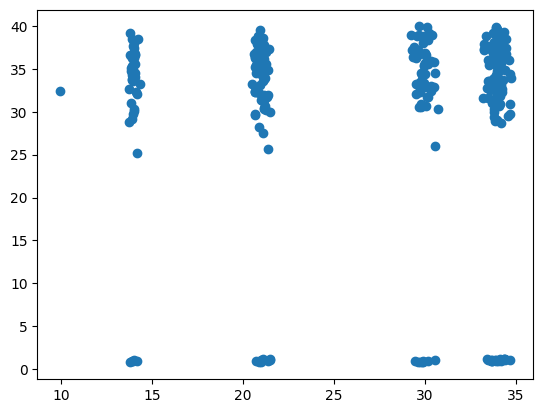

In [24]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'])

## เปลี่ยนความโปรงใส เพื่อดูข้อมูลที่ทับกัน

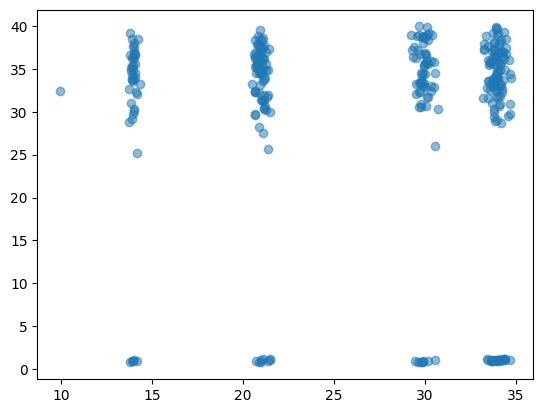

In [25]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],alpha=0.5)

## เปลี่ยนสี

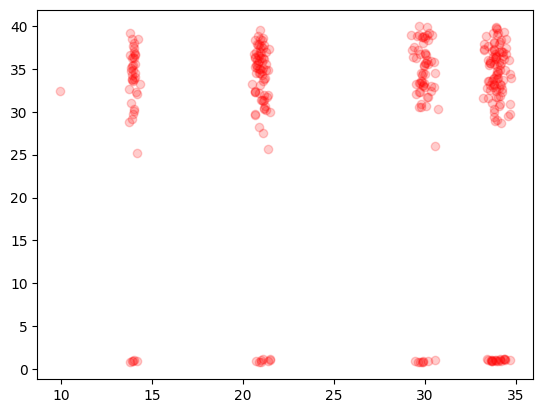

In [26]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],c='r',alpha=0.2)

## ใช้ค่าสีในการแสดงค่าของ column อื่น
ตัวอย่าง column > Officer-defined ethnicity

In [27]:
stopandsearch_df_dropna.groupby('Officer-defined ethnicity').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Officer-defined ethnicity,,,,,,,,,,,,,,
Asian,70,70,70,0,58,58,70,70,68,70,70,70,28,70
Black,47,47,47,0,37,37,47,47,47,47,47,47,20,47
Other,8,8,8,0,6,6,8,8,8,8,8,8,4,8
White,162,162,162,0,138,138,162,162,157,162,162,162,54,162


แทนค่า string ด้วย ตัวเลข

In [28]:
stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].replace(
    {'Black': 0, 'Other': 1, 'Asian':2, 'White':3})

/tmp/ipython-input-3139295968.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].replace(


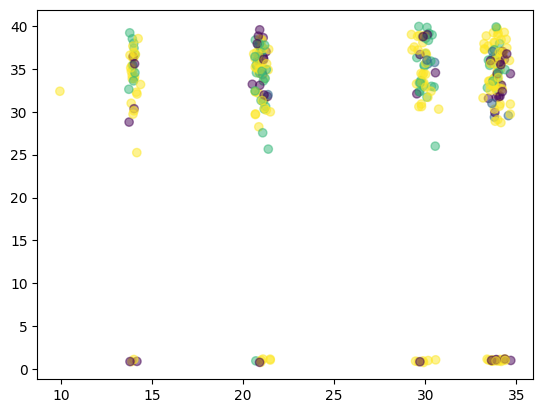

In [29]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],
            c=stopandsearch_df_dropna['Officer-defined ethnicity'],alpha=0.5)

In [30]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatter 2D

## scatter - default

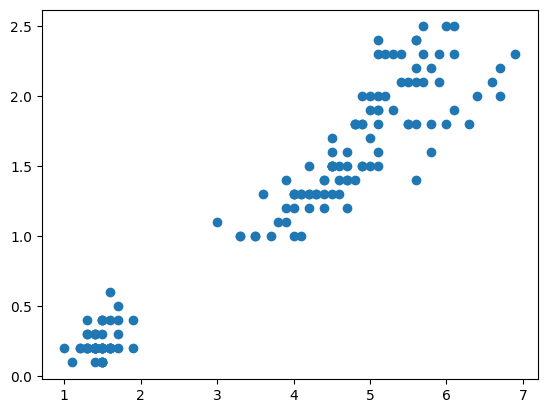

In [31]:
plt.scatter(df['PetalLength'],df['PetalWidth'])

### color

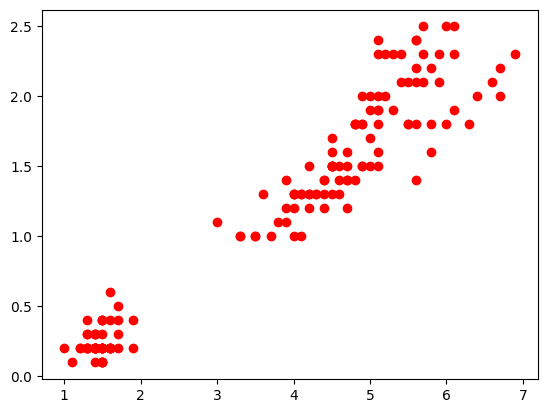

In [32]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c='r')

## ใส่สีให้แต่ละจุด

In [33]:
set(df['Name']) #ดูว่ามีค่าอะไรบ้าง

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [34]:
df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df2

/tmp/ipython-input-490463255.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


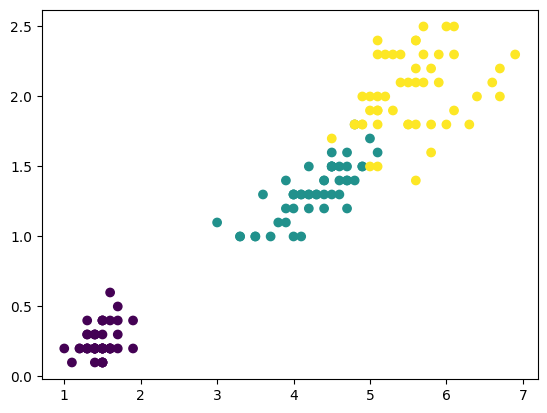

In [35]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'])

### alpha กำหนดความโปร่งแสง

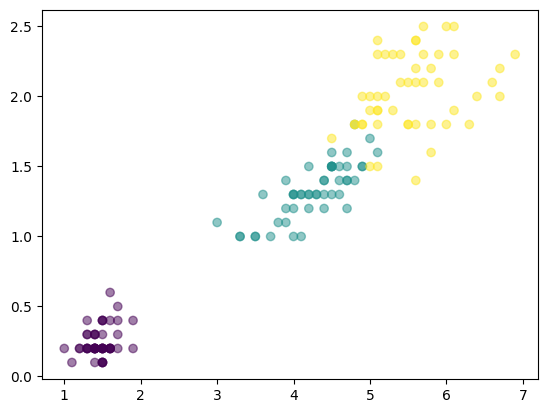

In [36]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ใช้ขนาดของ marker แสดงค่าของ feature

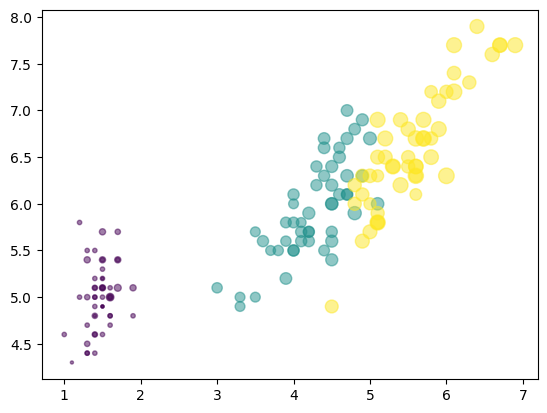

In [37]:
plt.scatter(df['PetalLength'],df['SepalLength'],s=50*df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker

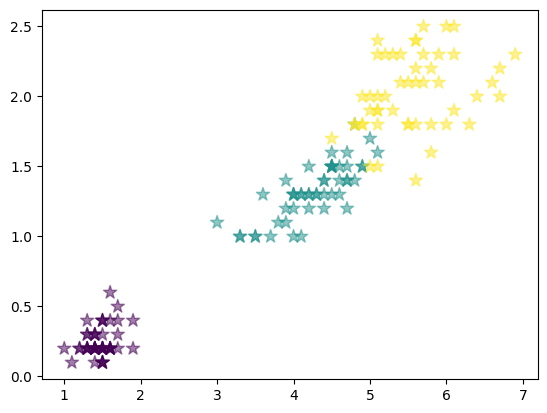

In [38]:
plt.scatter(df['PetalLength'],df['PetalWidth'],s=100,c=df2['Name'],alpha=0.5,marker='*')

## การ plot กราฟหลายๆอันซ้อนกัน

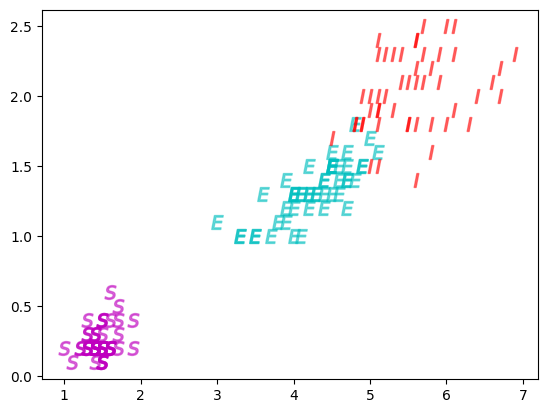

In [39]:
plt.scatter(df['PetalLength'][:50],df['PetalWidth'][:50],s=100,c='m',alpha=0.5,marker='$S$')
plt.scatter(df['PetalLength'][50:100],df['PetalWidth'][50:100],s=100,c='c',alpha=0.5,marker='$E$')
plt.scatter(df['PetalLength'][100:],df['PetalWidth'][100:],s=100,c='r',alpha=0.5,marker='$I$')

###Label-Legend

```plt.plot()``` input  ตัวที่ 3 คือ ตัวกำหนดหน้าตาของ marker

'หน้าตาmarker'-'ลักษณะของเส้นเชื่อมจุด'-'สี'

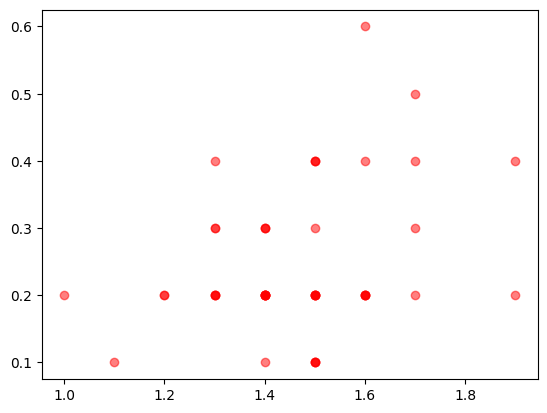

In [40]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5)

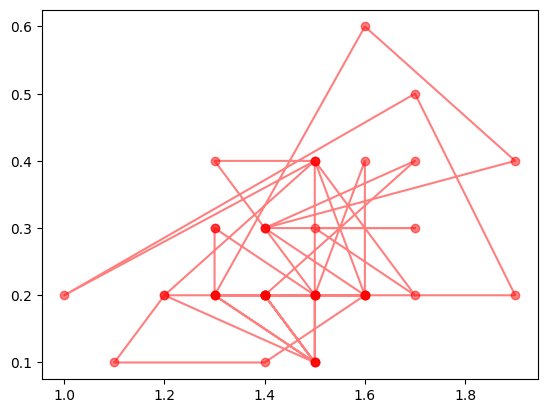

In [41]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o-r',alpha=0.5)

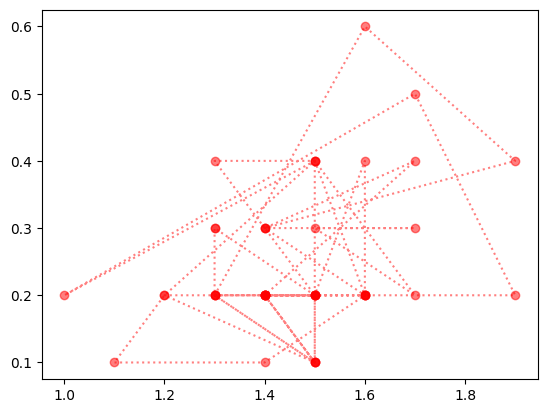

In [42]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o:r',alpha=0.5)

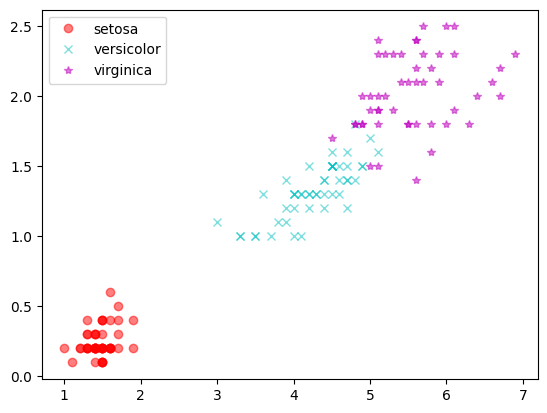

In [43]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend()

### การใส่ชื่อกราฟ และชื่อแกน

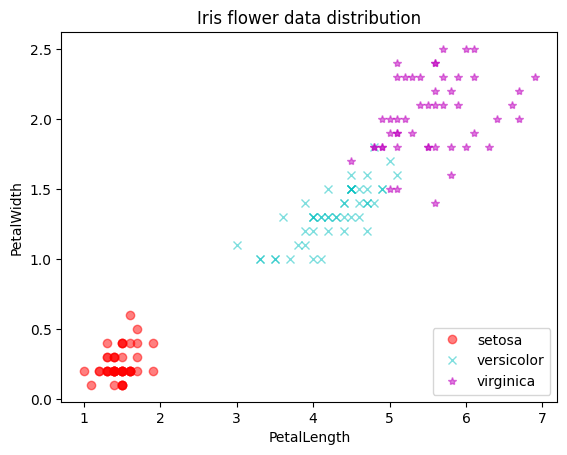

In [44]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend(loc='lower right')
plt.title('Iris flower data distribution') ##ชื่อกราฟ
plt.xlabel('PetalLength') ##ชื่อแกน X
plt.ylabel('PetalWidth'); ##ชื่อแกน y

### 3D scatter

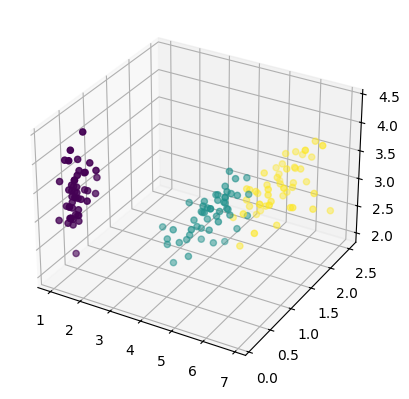

In [57]:
ax = plt.axes(projection ="3d")
ax.scatter3D(df['PetalLength'],df['PetalWidth'],df['SepalWidth'],c=df2['Name'])

## Bubble Chart

Scatter plot ที่ใช้ขนาดของ marker ในการสื่อปริมาณของข้อมูล

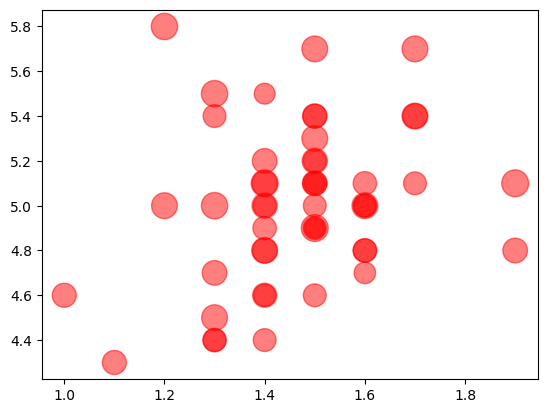

In [46]:
plt.scatter(df['PetalLength'][:50],df['SepalLength'][:50],s=150*df['PetalWidth'][100:],c='r',alpha=0.5)

### Example

### Box-plot

In [47]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


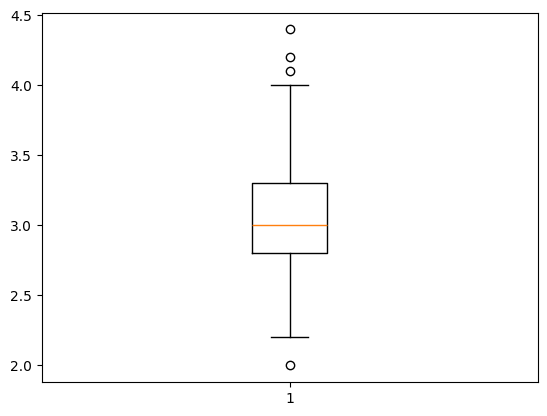

In [48]:
O = plt.boxplot(df['SepalWidth'])

In [65]:
stopandsearch_df_dropna

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.413110,35.578953,30.143316,Mixed/Multiple ethnic groups - Any other Mixed...,1.0,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,30.987020,13.857842,White - English/Welsh/Scottish/Northern Irish/...,3.0,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,32.273232,14.145320,White - English/Welsh/Scottish/Northern Irish/...,3.0,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,0.897254,13.894936,White - English/Welsh/Scottish/Northern Irish/...,3.0,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,34.236785,13.911355,White - English/Welsh/Scottish/Northern Irish/...,3.0,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Person search,2025-01-31T21:24:00+00:00,False,NaN,52.134841,-0.483243,36.734918,34.469511,Mixed/Multiple ethnic groups - White and Black...,0.0,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False
382,Person search,2025-01-31T21:24:00+00:00,False,NaN,52.134841,-0.483243,0.974582,33.876274,White - English/Welsh/Scottish/Northern Irish/...,3.0,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
383,Person search,2025-01-31T21:35:00+00:00,False,NaN,52.134841,-0.483243,31.682821,30.142468,White - English/Welsh/Scottish/Northern Irish/...,3.0,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
384,Person search,2025-01-31T22:15:00+00:00,False,NaN,51.881800,-0.368669,37.924610,33.220011,Other ethnic group - Not stated,3.0,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,True,False


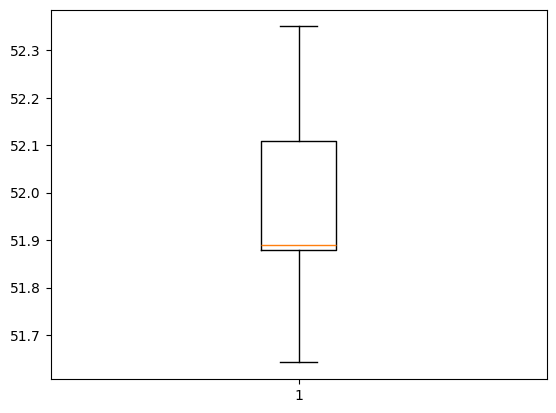

In [66]:
O = plt.boxplot(stopandsearch_df_dropna['Latitude'].dropna())

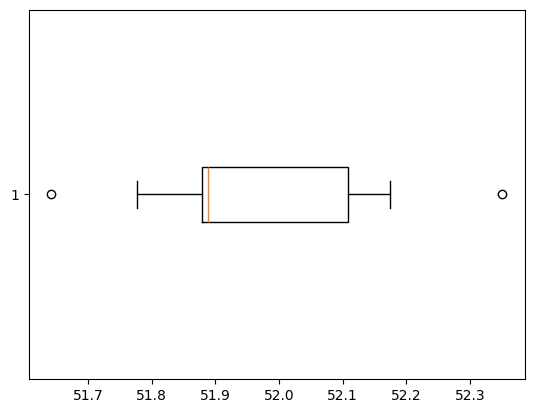

In [68]:
O = plt.boxplot(stopandsearch_df_dropna['Latitude'].dropna(),whis=1,vert=False)

In [69]:
O

{'whiskers': [<matplotlib.lines.Line2D at 0x7e76b17f5f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e76b17f6ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e76b17f63c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e76b17f7080>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e76b17f7380>],
 'means': []}

In [50]:
O['fliers']

In [51]:
O['fliers'][0]

In [70]:
O['fliers'][0].get_xdata()

array([51.642262, 52.349993])

In [ ]:
stopandsearch_df_dropna['Latitude']==0['filter'][0]

In [52]:
dir(O['fliers'][0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_dash_pattern',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_different_canvas',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_fully_clipped_to_axes',
 '_gapcolor',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_invalidx',
 '_invalidy',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfac

In [53]:
O['fliers'][0].get_ydata()

array([2. , 4.4, 4.1, 4.2])

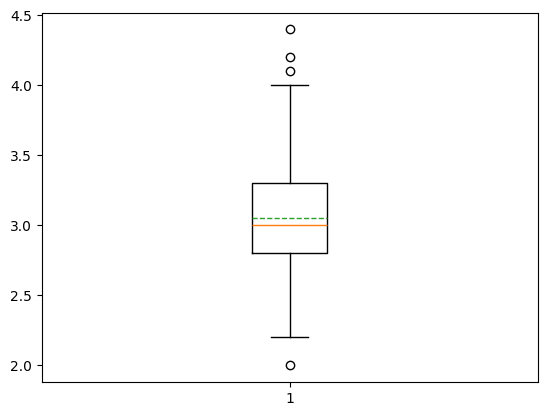

In [54]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True)

In [55]:
O

{'whiskers': [<matplotlib.lines.Line2D at 0x7e76bc458e60>,
 'caps': [<matplotlib.lines.Line2D at 0x7e76bc459430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e76bc458b60>],
 'medians': [<matplotlib.lines.Line2D at 0x7e76bc4598b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e76bc459e50>],
 'means': [<matplotlib.lines.Line2D at 0x7e76bc459b50>]}

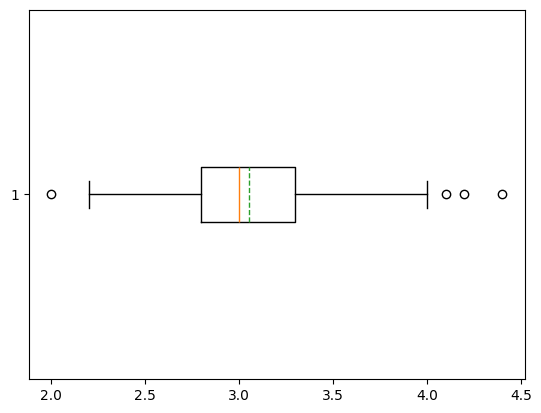

In [56]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True,vert=False)

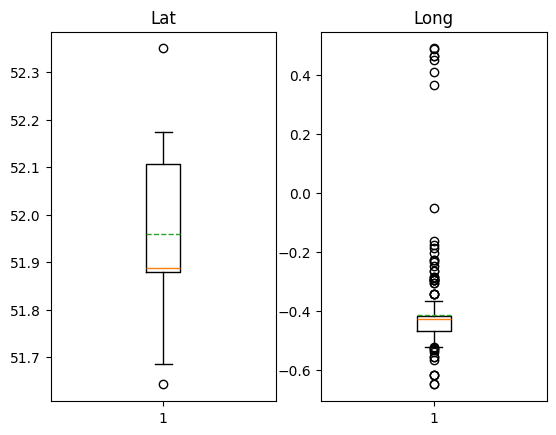

In [71]:
plt.subplot(1, 2, 1)
plt.boxplot(stopandsearch_df['Latitude'].dropna(), whis=1, vert=True, showmeans=True, meanline=True)
plt.title('Lat')
plt.subplot(1, 2, 2)
plt.boxplot(stopandsearch_df['Longitude'].dropna(), whis=1, vert=True, showmeans=True, meanline=True)
plt.title('Long');

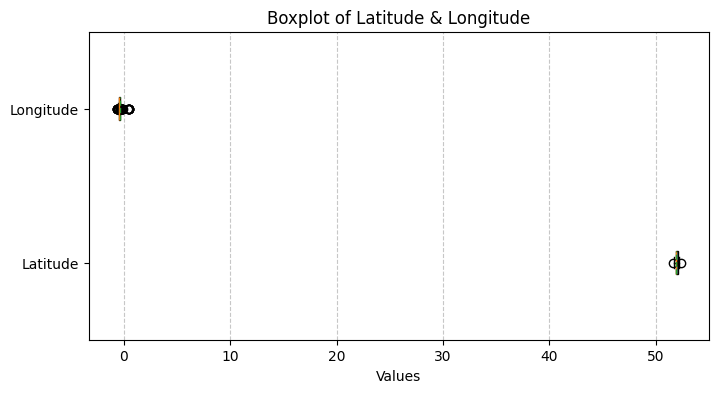

In [74]:
# quiz 10 แก้ code ของกราฟข้างบนให้แสดง boxplot ในแนวนอน และ boxplot ของ Latitude และ logitude
plt.figure(figsize=(8,4))  # ขยายกราฟให้กว้างขึ้น

plt.boxplot([stopandsearch_df['Latitude'].dropna(),
             stopandsearch_df['Longitude'].dropna()],
            whis=1, vert=False, showmeans=True, meanline=True,
            patch_artist=True)  # เติมสี

plt.yticks([1, 2], ['Latitude', 'Longitude'])
plt.title('Boxplot of Latitude & Longitude')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# HW7 plot กราฟ แสดง การกระจายของข้อมูลใน india imdb และ มาพรีเซ็น เป็นกลุ่ม (2 กราฟ)